In [1]:
import random
import numpy as np
import pandas as pd
import pathlib
from astropy.table import Table
import argparse
from fits_utils import BPT_diagnostic
import matplotlib.pyplot as plt
from download_utils import *
from fits_utils import *
import seaborn as sns

data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')

In [1]:
# # !Remove data when restarting the cube-processing. THIS CANNOT BE UNDONE!!!!
# ! rm -r /gscratch/scrubbed/mmckay18/DATA/raw/*

# ! rm -r /gscratch/scrubbed/mmckay18/DATA/processed/cubes/*
# ! rm -r /gscratch/scrubbed/mmckay18/DATA/processed/patches/*
# ! rm -r /gscratch/scrubbed/mmckay18/DATA/processed/labels/*

# ! rm -r /gscratch/scrubbed/mmckay18/DATA/splits/*

In [2]:
# Download SDSS and Pipe3D catalog
from download_utils import *
# Downloading data DAP Maps and Pipe3D Maps from MaNGA MPL11

# get dap and pipe3d catalogs for plateifu
print("Downloading DAPALL data...")
dap_url = "https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits"
dapall_save_path = data_dir/ 'raw'/ 'dapall-v3_1_1-3.1.0.fits'  # Update this path to your specific remote directory path
download_file(dap_url, dapall_save_path)

print("Downloading Pipe3D data...")
pipe3d_url = "https://data.sdss.org/sas/dr17/manga/spectro/pipe3d/v3_1_1/3.1.1/SDSS17Pipe3D_v3_1_1.fits"
pipe3d_save_path = data_dir/ 'raw'/ 'SDSS17Pipe3D_v3_1_1.fits'  # Update this path to your specific remote directory path
download_file(pipe3d_url, pipe3d_save_path)

File downloaded successfully and saved as /gscratch/scrubbed/mmckay18/DATA/raw/dapall-v3_1_1-3.1.0.fits
File downloaded successfully and saved as /gscratch/scrubbed/mmckay18/DATA/raw/SDSS17Pipe3D_v3_1_1.fits


## Process Datacubes

## Train Test Split from split_char.ipynb

In [3]:
# Must run for combine catalogs
manga_catalogue_path = data_dir / 'raw'/ 'SDSS17Pipe3D_v3_1_1.fits'
dat = Table.read(manga_catalogue_path, format='fits', hdu=1)
cat_df = dat.to_pandas()
cat_df['PLATEIFU'] = cat_df['plateifu'].apply(lambda x: x.decode())
cat_df['IFUSIZE'] = cat_df['PLATEIFU'].map(lambda x: x.split('-')[-1][:-2])

In [6]:
# !python create_data_splits.py --split_dir='BPT' --label_task='BPT' --patch_norm='global'

Catalog #rows: 10220, Catalog After cuts #rows: 100
Splitting 20 into train/val/test
Splitting 9 into train/val/test
Group too small (5)
Splitting 11 into train/val/test
Splitting 14 into train/val/test
Splitting 8 into train/val/test
Splitting 14 into train/val/test
Splitting 11 into train/val/test
Splitting 8 into train/val/test
N=9  / 9 / 73 (0.0989)
Train: 73
Val: 9
Test: 9


In [3]:
!python create_easy_data_splits.py --split_dir='BPT' --patch_norm='global' --label_task='BPT' 

In [12]:
!ls /gscratch/scrubbed/mmckay18/DATA/splits/BPT/
# !mkdir /gscratch/scrubbed/mmckay18/DATA/splits/BPT_easy

test_fits.csv  train_fits.csv  val_fits.csv


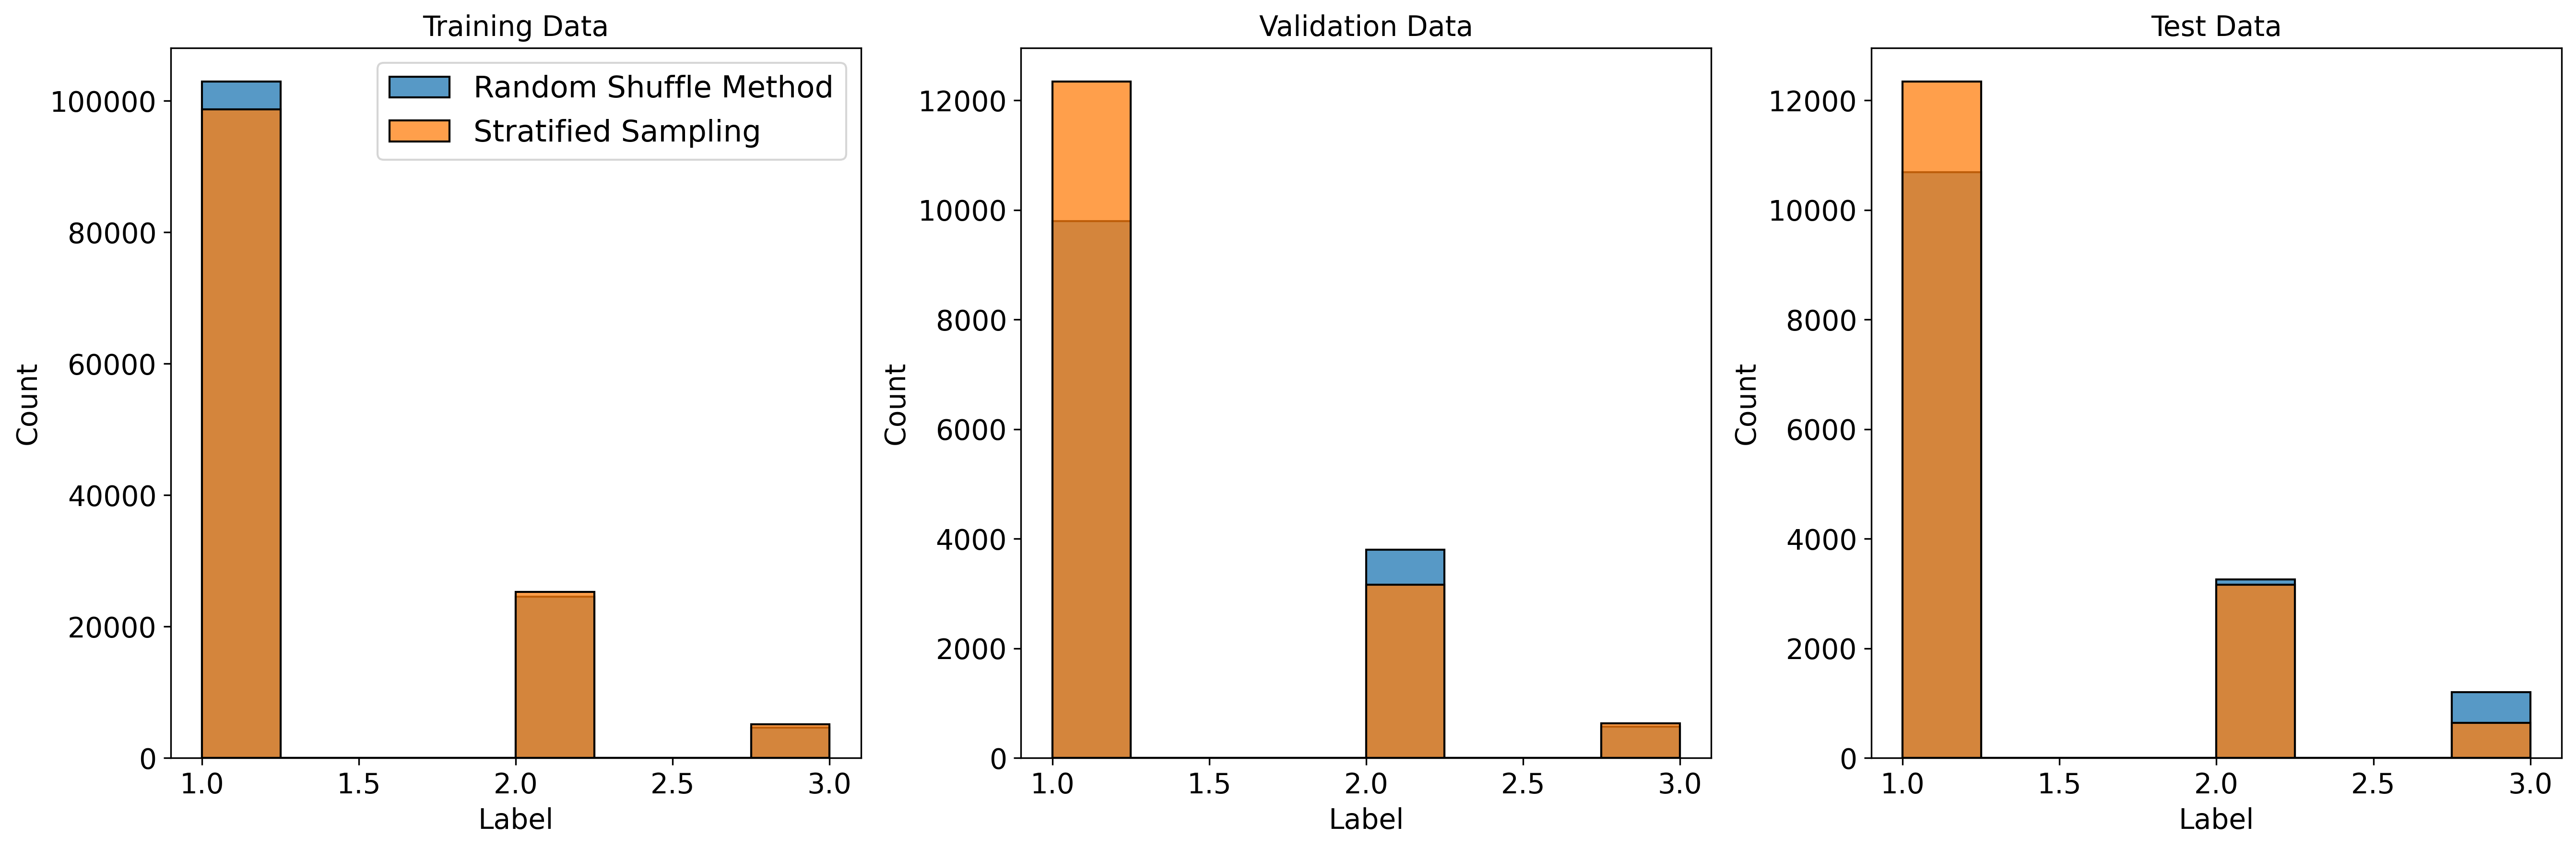

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV files
train_global_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train-global.csv')
train_global_easy_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train-global_easy.csv')
val_global_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/val-global.csv')
val_global_easy_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/val-global_easy.csv')
test_global_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/test-global.csv')
test_global_easy_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/test-global_easy.csv')

# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=300)

# Plot for training data
sns.histplot(data=train_global_df, x='label', binwidth=0.25, label='Random Shuffle Method', ax=axes[0])
sns.histplot(data=train_global_easy_df, x='label', binwidth=0.25, ax=axes[0], label='Stratified Sampling')
axes[0].set_title('Training Data', fontsize=14)
axes[0].set_xlabel('Label', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].legend(fontsize=15)

# Plot for validation data
sns.histplot(data=val_global_df, x='label', binwidth=0.25,  ax=axes[1])
sns.histplot(data=val_global_easy_df, x='label', binwidth=0.25, ax=axes[1])
axes[1].set_title('Validation Data', fontsize=14)
axes[1].set_xlabel('Label', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=14)
# axes[1].legend()

# Plot for test data
sns.histplot(data=test_global_df, x='label', binwidth=0.25,  ax=axes[2],)
sns.histplot(data=test_global_easy_df, x='label', binwidth=0.25, ax=axes[2])
axes[2].set_title('Test Data', fontsize=14)
axes[2].set_xlabel('Label', fontsize=14)
axes[2].set_ylabel('Count', fontsize=14)
axes[2].tick_params(axis='both', which='major', labelsize=14)
# axes[2].legend(fontsize=12)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig('/gscratch/astro/mmckay18/FIGURES/bpt_labels_split.pdf', dpi=300)

# Show the plot
plt.show()


In [60]:
from utils import get_index_to_name
from vis_fns import bin_OH_labels
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
data_dir = pathlib.Path('/gscratch/astro/mmckay18/DATA/')


patch_norm='global'
split_dir = 'BPT'
easy_splits = False
OH_key='BPT'
OH_log=False

split_str = '_easy' if easy_splits else ''
csv_dir = data_dir / 'splits' / split_dir
split_dict = {
    'train':csv_dir / f'train-{patch_norm}{split_str}.csv',
    'val':csv_dir / f'val-{patch_norm}{split_str}.csv',
    'test':csv_dir / f'test-{patch_norm}{split_str}.csv'
}

In [4]:
for column in cat_df.columns:
    print(column)    

name
plate
ifudsgn
plateifu
mangaid
objra
objdec
log_SFR_Ha
FoV
Re_kpc
e_log_Mass
e_log_SFR_Ha
log_Mass
log_SFR_ssp
log_NII_Ha_cen
e_log_NII_Ha_cen
log_OIII_Hb_cen
e_log_OIII_Hb_cen
log_SII_Ha_cen
e_log_SII_Ha_cen
log_OII_Hb_cen
e_log_OII_Hb_cen
EW_Ha_cen
e_EW_Ha_cen
ZH_LW_Re_fit
e_ZH_LW_Re_fit
alpha_ZH_LW_Re_fit
e_alpha_ZH_LW_Re_fit
ZH_MW_Re_fit
e_ZH_MW_Re_fit
alpha_ZH_MW_Re_fit
e_alpha_ZH_MW_Re_fit
Age_LW_Re_fit
e_Age_LW_Re_fit
alpha_Age_LW_Re_fit
e_alpha_Age_LW_Re_fit
Age_MW_Re_fit
e_Age_MW_Re_fit
alpha_Age_MW_Re_fit
e_alpha_Age_MW_Re_fit
Re_arc
DL
DA
PA
ellip
log_Mass_gas
vel_sigma_Re
e_vel_sigma_Re
log_SFR_SF
log_SFR_D_C
OH_O3N2_cen
e_OH_O3N2_cen
OH_N2_cen
e_OH_N2_cen
OH_ONS_cen
e_OH_ONS_cen
OH_R23_cen
e_OH_R23_cen
OH_pyqz_cen
e_OH_pyqz_cen
OH_t2_cen
e_OH_t2_cen
OH_M08_cen
e_OH_M08_cen
OH_T04_cen
e_OH_T04_cen
OH_dop_cen
e_OH_dop_cen
OH_O3N2_EPM09_cen
e_OH_O3N2_EPM09_cen
log_OI_Ha_cen
e_log_OI_Ha_cen
Ha_Hb_cen
e_Ha_Hb_cen
log_NII_Ha_Re
e_log_NII_Ha_Re
log_OIII_Hb_Re
e_log_OIII_Hb_R

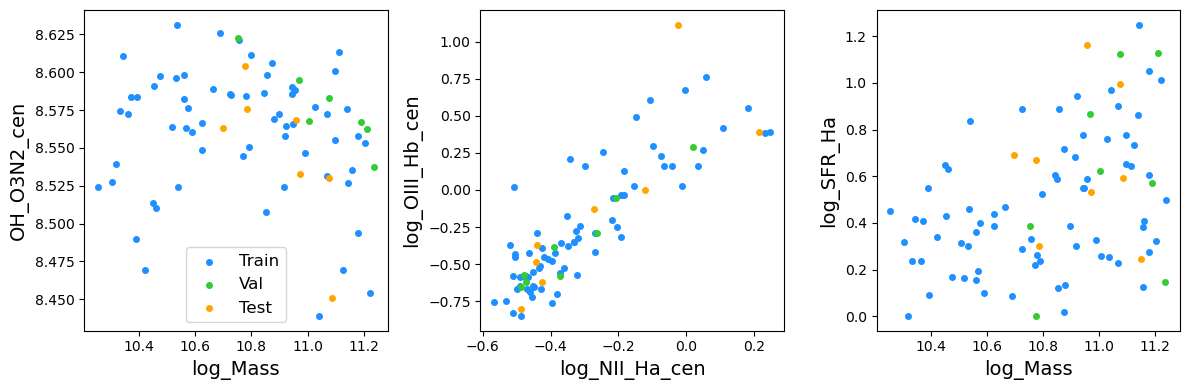

In [29]:
# Visualize the datasplit
data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')
split_dir = 'BPT'

csv_dir = data_dir / 'splits' / split_dir
file_list_dict = {
    'train': csv_dir / 'train_fits.csv',
    'val': csv_dir / 'val_fits.csv',
    'test': csv_dir / 'test_fits.csv',
}

cols_of_interest = ['OH_O3N2_cen','EW_Ha_cen','log_SFR_Ha','log_Mass','Av_gas_Re','log_NII_Ha_cen']

fig,axes = plt.subplots(1,3,figsize=(12,4))
colors = ['DodgerBlue','limegreen','orange']
# name_pairs = [('log_Mass','OH_O3N2_cen'), ('OH_O3N2_cen','log_NII_Ha_cen'), ('log_SFR_Ha','Av_gas_Re')]
name_pairs = [('log_Mass','OH_O3N2_cen'), ('log_NII_Ha_cen','log_OIII_Hb_cen'), ('log_Mass','log_SFR_Ha')]


for i, (split_name, csv_path) in enumerate(file_list_dict.items()):

    file_list = pd.read_csv(csv_path, names=['fits_file'])['fits_file'].map(lambda x: '-'.join(x.split('/')[-3:-1])).tolist()

    # find matching rows
    inds = cat_df['PLATEIFU'].map(lambda x: x in file_list)

    # plot
    for ax_i in range(len(name_pairs)):
        x_col, y_col = name_pairs[ax_i]
        fig.axes[ax_i].scatter(cat_df[inds][x_col],cat_df[inds][y_col], s=16, c=colors[i], label=split_name.title())

for ax_i in range(len(name_pairs)):
    x_col, y_col = name_pairs[ax_i]
    fig.axes[ax_i].set_xlabel(x_col, size=14)
    fig.axes[ax_i].set_ylabel(y_col, size=14)
    if ax_i == 0:
        fig.axes[ax_i].legend(fontsize=12)
plt.tight_layout()
plt.savefig('/gscratch/astro/mmckay18/FIGURES/split_properties.pdf', dpi=300)

In [16]:
# from utils import get_index_to_name
# from vis_fns import bin_OH_labels, bin_BPT_labels
# import pandas as pd
# import numpy as np
# import pathlib
# import matplotlib.pyplot as plt
# data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')


# patch_norm='global'
# split_dir = 'BPT'
# easy_splits = False
# OH_key='BPT'
# OH_log=False

# split_str = '_easy' if easy_splits else ''
# csv_dir = data_dir / 'splits' / split_dir
# split_dict = {
#     'train':csv_dir / f'train-{patch_norm}{split_str}.csv',
#     'val':csv_dir / f'val-{patch_norm}{split_str}.csv',
#     'test':csv_dir / f'test-{patch_norm}{split_str}.csv'
# }

# fig, axes = plt.subplots(1,len(split_dict.keys()), figsize=(12,4))

# label_map = get_index_to_name(OH_key, log=OH_log)
# fixed_label_order = [v for k,v in label_map.items()]

# for i, (split_name, csv_path) in enumerate(split_dict.items()):
#     df = pd.read_csv(csv_path)
#     df['label'] = bin_BPT_labels(df['label'], OH_key=OH_key)
#     print("Unique values in 'label' after binning:", df['label'].unique())

#     ax = fig.axes[i]
#     df['label'].map(label_map).value_counts()[fixed_label_order].plot(kind='bar', ax=ax, rot=45, fontsize=12)
# #     print("Unique values in 'label' after mapping:", df['label'].unique())

#     ax.set_title(f'{split_name.title()} ({len(df):.1e} patches)', fontsize=18)
#     ax.set_xlabel('log( O / H )')
# fig.tight_layout()

In [17]:
for key in fixed_label_order:
    print(key)

None
SF
COMP
AGN


In [18]:
value_counts = df['label'].value_counts()
value_counts.index

Index(['SF', 'COMP', 'AGN'], dtype='object')

In [19]:
cat_df.columns

Index(['name', 'plate', 'ifudsgn', 'plateifu', 'mangaid', 'objra', 'objdec',
       'log_SFR_Ha', 'FoV', 'Re_kpc',
       ...
       'P(Sm)', 'P(Irr)', 'best_type_n', 'best_type', 'nsa_nsaid', 'Vmax_w',
       'Num_w', 'QCFLAG', 'PLATEIFU', 'IFUSIZE'],
      dtype='object', length=538)

Unique values in 'label' after binning: [1 2 3]
Unique values in 'label' after mapping: ['SF' 'COMP' 'AGN']
Unique values in 'label' after binning: [2 1 3]
Unique values in 'label' after mapping: ['COMP' 'SF' 'AGN']
Unique values in 'label' after binning: [1 2 3]
Unique values in 'label' after mapping: ['SF' 'COMP' 'AGN']


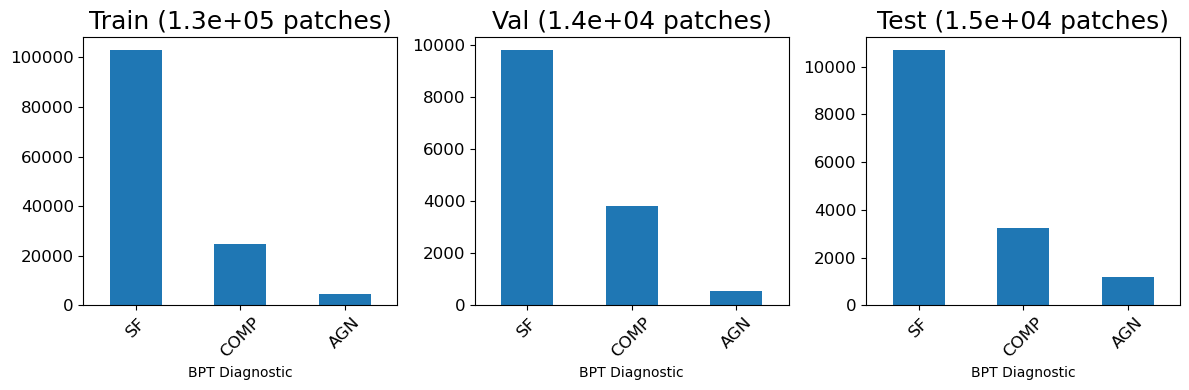

In [30]:
from utils import get_index_to_name
from vis_fns import bin_OH_labels, bin_BPT_labels
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt

data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')

patch_norm = 'global'
split_dir = 'BPT'
easy_splits = False
OH_key = 'BPT'
OH_log = False

split_str = '_easy' if easy_splits else ''
csv_dir = data_dir / 'splits' / split_dir
split_dict = {
    'train': csv_dir / f'train-{patch_norm}{split_str}.csv',
    'val': csv_dir / f'val-{patch_norm}{split_str}.csv',
    'test': csv_dir / f'test-{patch_norm}{split_str}.csv'
}

fig, axes = plt.subplots(1, len(split_dict.keys()), figsize=(12, 4))

label_map = get_index_to_name(OH_key, log=OH_log)
fixed_label_order = [v for k, v in label_map.items()]

for i, (split_name, csv_path) in enumerate(split_dict.items()):
    df = pd.read_csv(csv_path)
    df['label'] = bin_BPT_labels(df['label'], OH_key=OH_key)
    print("Unique values in 'label' after binning:", df['label'].unique())

    # Map the labels
    df['label'] = df['label'].map(label_map)

    # Check for unique values in the mapped labels
    print("Unique values in 'label' after mapping:", df['label'].unique())

    # Filter fixed_label_order to include only labels that exist in the data
    valid_labels = [label for label in fixed_label_order if label in df['label'].values]

    # Plot the data
    ax = fig.axes[i]
    df['label'].value_counts().reindex(valid_labels).plot(kind='bar', ax=ax, rot=45, fontsize=12)

    ax.set_title(f'{split_name.title()} ({len(df):.1e} patches)', fontsize=18)
    ax.set_xlabel('BPT Diagnostic')

fig.tight_layout()

# Save the figure if needed
plt.savefig('/gscratch/astro/mmckay18/FIGURES/split_patch_histogram.pdf', dpi=300)

In [11]:
manga_catalogue_path = data_dir / 'raw'/ 'SDSS17Pipe3D_v3_1_1.fits'
dat = Table.read(manga_catalogue_path, format='fits', hdu=1)
cat_df = dat.to_pandas()
cat_df['PLATEIFU'] = cat_df['plateifu'].apply(lambda x: x.decode())
cat_df['IFUSIZE'] = cat_df['PLATEIFU'].map(lambda x: x.split('-')[-1][:-2])

# BPT classification
from fits_utils import BPT_diagnostic
suffix = 'cen' # ratio within central 2.5 arcsec aperture

OIII_key = f'log_OIII_Hb_{suffix}'
NII_key = f'log_NII_Ha_{suffix}'
# tmp_SF, tmp_AGN = BPT_diagnostic(cat_df[NII_key])

# cat_df['BPT_flag'] = np.nan
# cat_df.loc[cat_df[OIII_key] < tmp_SF,'BPT_flag'] = 1
# cat_df.loc[(cat_df[OIII_key] >= tmp_SF) & (cat_df['log_OIII_Hb_cen'] < tmp_AGN),'BPT_flag'] = 2
# cat_df.loc[(cat_df[OIII_key] >= tmp_AGN),'BPT_flag'] = 3
# cat_df.loc[(cat_df[OIII_key] > 1.5),'BPT_flag'] = np.nan
# cat_df.loc[(cat_df[OIII_key] < -1.5),'BPT_flag'] = np.nan
# cat_df.loc[(cat_df[NII_key] > 1.0),'BPT_flag'] = np.nan
# cat_df.loc[(cat_df[NII_key] < -1.5),'BPT_flag'] = np.nan


# Sample dataset from larger catalogue  
## '/qfs/projects/gumby/data/manga/splits/{SPLIT_DIR}/{split}_fits.csv'
split_dir = 'BPT'

# using galaxies that are within 1st and 99th percentile in each of these properties
cols_of_interest = ['EW_Ha_cen']
condition_list = [((cat_df[key] > cat_df[key].quantile(0.05)) & (cat_df[key] < cat_df[key].quantile(0.95)))for key in cols_of_interest]

# make cuts on SFR, Av, stellar mass, central metallicity, IFU size, inclination
# condition_list += [(cat_df['BPT_flag'] == 1)]
condition_list += [(cat_df['log_SFR_Ha'] > 0.0)]
condition_list += [(cat_df['log_Mass'] >= 9.5)]
condition_list += [(cat_df['log_Mass'] <= 11.00)]
condition_list += [(cat_df['OH_Pet04_O3N2_Re_fit'] <= 8.8)]
condition_list += [(cat_df['Av_gas_Re'] < 2.0)]
condition_list += [(cat_df['IFUSIZE'] == '127') | (cat_df['IFUSIZE'] == '91') | (cat_df['IFUSIZE'] == '61')]
condition_list += [(cat_df['nsa_inclination'] <= 45.0)]
inds = np.logical_and.reduce(condition_list)

# make dataframe of galaxies
df = cat_df[inds].copy()
df = df.sample(n=100) #! randomly sample catalog dataframe
df.reset_index(inplace=True)
print(len(cat_df), len(df))
print(df['IFUSIZE'].value_counts())


# Split sample
cols_to_keep = cols_of_interest + ['PLATEIFU','nsa_redshift']
cols_to_bin = ['log_NII_Ha_cen']

for this_key in cols_to_bin:
    q=3
    labels = [f'{this_key}_{i}' for i in range(q)]
    df[f'{this_key}_bins'] = pd.qcut(df[this_key], q=q, labels=labels)

# want a similar number of IFU sizes in each split
group_by_cols = [f'{this_key}_bins' for this_key in cols_to_bin] + ['IFUSIZE']
grouper = df.groupby(by=group_by_cols)
list_of_dicts = []
min_gals = 8
max_gals = 50

for group, grouped_df in grouper:
    ngals = len(grouped_df)
    if ngals > max_gals:
        tmp_df = grouped_df.sample(n=max_gals)
        print(f'Sampling N={max_gals} from group')
    elif ngals < min_gals:
        print(f'Group too small ({ngals})')
        continue
    else:
        print(f'Splitting {ngals} into train/val/test')
        tmp_df = grouped_df
    
    ginds = tmp_df.index.tolist()
    random.shuffle(ginds)
#     n_train = int(ngals*0.85)
#     n_val = max(1,int(ngals*0.07))

#     train_inds = ginds[0:n_train]
#     val_inds = ginds[n_train:n_train+n_val]
#     test_inds = ginds[n_train+n_val:n_train+n_val+n_val]
    
    n_train = int(ngals * 0.80)
    n_val = max(1, int(ngals * 0.10))
    n_test = ngals - n_train - n_val

    train_inds = ginds[0:n_train]
    val_inds = ginds[n_train:n_train + n_val]
    test_inds = ginds[n_train + n_val:n_train + n_val + n_test]

    
    for i in ginds:
        if i in train_inds:
            this_dict = {'split':'train'}
            this_dict.update(df.iloc[i][cols_to_keep].to_dict())
            list_of_dicts.append(this_dict)
        elif i in val_inds:
            this_dict = {'split':'val'}
            this_dict.update(df.iloc[i][cols_to_keep].to_dict())
            list_of_dicts.append(this_dict)
        elif i in test_inds:
            this_dict = {'split':'test'}
            this_dict.update(df.iloc[i][cols_to_keep].to_dict())
            list_of_dicts.append(this_dict)

new_df = pd.DataFrame(list_of_dicts)
print(f"N={len(new_df[new_df.split == 'test'])}  / {len(new_df[new_df.split == 'val'])} / {len(new_df[new_df.split == 'train'])}", f"({len(new_df[new_df.split == 'val'])*1.0/len(new_df):.3})")

# Save CSV
split_list = ['train', 'val', 'test']
new_df['fits_file'] = new_df['PLATEIFU'].map(lambda x: data_dir / 'raw' / x.split('-')[0] / x.split('-')[1] / f'manga-{x}-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz')

outdir = data_dir / 'splits' / split_dir
print(outdir)
if not outdir.exists():
    outdir.mkdir(parents=True, exist_ok=True)
    print(f'created {outdir}')

for split in split_list:
    inds = new_df['split'] == split
    print(f'{split.title()}: {len(new_df[inds])}')
    output_csv = outdir / f'{split}_fits.csv'
    new_df[inds]['fits_file'].to_csv(output_csv, index=False,header=False)


10220 100
127    48
61     38
91     14
Name: IFUSIZE, dtype: int64
Splitting 12 into train/val/test
Splitting 14 into train/val/test
Splitting 8 into train/val/test
Splitting 19 into train/val/test
Splitting 10 into train/val/test
Group too small (4)
Splitting 17 into train/val/test
Splitting 14 into train/val/test
Group too small (2)
N=14  / 7 / 73 (0.0745)
/gscratch/scrubbed/mmckay18/DATA/splits/BPT
Train: 73
Val: 7
Test: 14


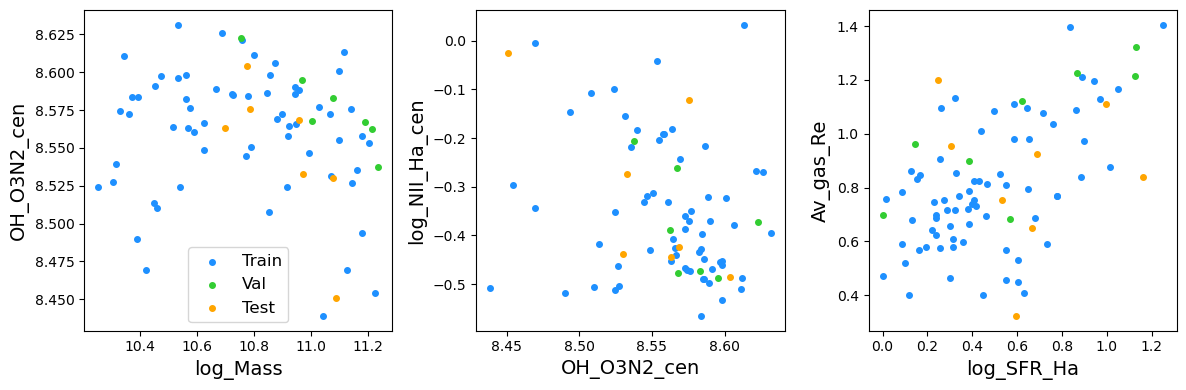

In [21]:
# Visualize the datasplit

split_dir = 'BPT'

csv_dir = data_dir / 'splits' / split_dir
file_list_dict = {
    'train': csv_dir / 'train_fits.csv',
    'val': csv_dir / 'val_fits.csv',
    'test': csv_dir / 'test_fits.csv',
}

cols_of_interest = ['OH_O3N2_cen','EW_Ha_cen','log_SFR_Ha','log_Mass','Av_gas_Re','log_NII_Ha_cen']

fig,axes = plt.subplots(1,3,figsize=(12,4))
colors = ['DodgerBlue','limegreen','orange']
name_pairs = [('log_Mass','OH_O3N2_cen'), ('OH_O3N2_cen','log_NII_Ha_cen'), ('log_SFR_Ha','Av_gas_Re')]

for i, (split_name, csv_path) in enumerate(file_list_dict.items()):

    file_list = pd.read_csv(csv_path, names=['fits_file'])['fits_file'].map(lambda x: '-'.join(x.split('/')[-3:-1])).tolist()

    # find matching rows
    inds = cat_df['PLATEIFU'].map(lambda x: x in file_list)

    # plot
    for ax_i in range(len(name_pairs)):
        x_col, y_col = name_pairs[ax_i]
        fig.axes[ax_i].scatter(cat_df[inds][x_col],cat_df[inds][y_col], s=16, c=colors[i], label=split_name.title())

for ax_i in range(len(name_pairs)):
    x_col, y_col = name_pairs[ax_i]
    fig.axes[ax_i].set_xlabel(x_col, size=14)
    fig.axes[ax_i].set_ylabel(y_col, size=14)
    if ax_i == 0:
        fig.axes[ax_i].legend(fontsize=12)
plt.tight_layout()

## Cube_processing

In [14]:
# !python cube_processing.py --split_dir=BPT --patch_size=9 --patch_norm=global --label_task=BPT --glob_patches --splits=train


train...
patch_norm is global 
 /gscratch/scrubbed/mmckay18/DATA/splits/BPT/train-global.csv
1/62...
	/gscratch/scrubbed/mmckay18/DATA/raw/9490/12702/manga-9490-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
	Cube already exists!
	/gscratch/scrubbed/mmckay18/DATA/processed/cubes/9490/12702.h5
	Making label map:
	/gscratch/scrubbed/mmckay18/DATA/processed/labels/BPT/9490-12702.npy

		Starr proessing map
	FITS File Map: /gscratch/scrubbed/mmckay18/DATA/raw/9490/12702/manga-9490-12702-MAPS-SPX-MILESHC-MASTARSSP.fits.gz
	Making BPT using generate_BPT_labels

Start generate_BPT_labels
Has nan: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] +inf: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [F

In [16]:
# !python process_single_cube.py --patch_size=9 --patch_norm=global --label_task=BPT --plateid=8948-12703


	Cube already exists!
	/gscratch/scrubbed/mmckay18/DATA/processed/cubes/8948/12703.h5
	Making label map:
	/gscratch/scrubbed/mmckay18/DATA/processed/labels/BPT/8948-12703.npy
	FITS Map file: /gscratch/scrubbed/mmckay18/DATA/raw/8948/12703/manga-8948-12703-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz

		Starr proessing map
	FITS File Map: /gscratch/scrubbed/mmckay18/DATA/raw/8948/12703/manga-8948-12703-MAPS-SPX-MILESHC-MASTARSSP.fits.gz
	Making BPT using generate_BPT_labels

Start generate_BPT_labels
Has nan: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]] +inf: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [F

# Evaluate model


130
130


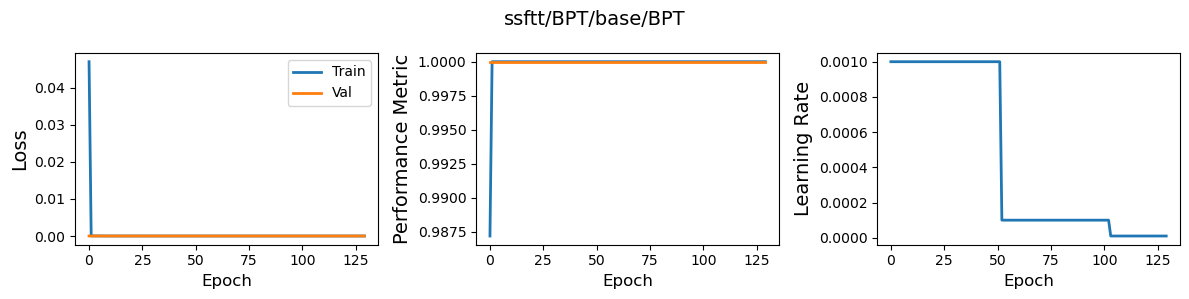

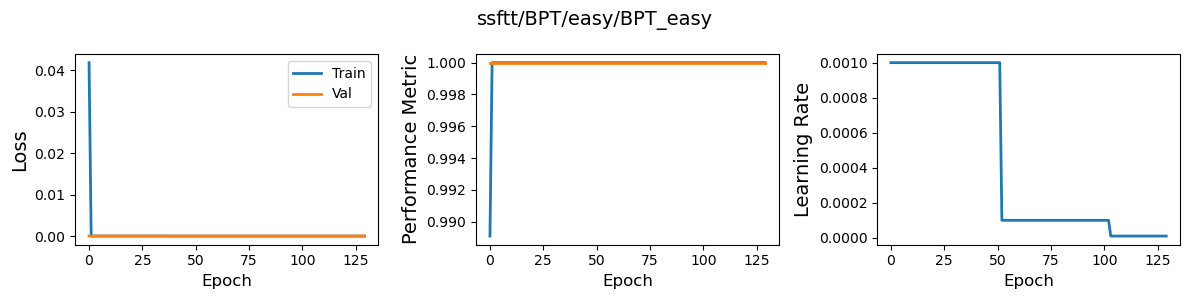

In [1]:
from plotting import plot_training_curve
import pathlib

# load in trained weights
arch_type='ssftt/BPT/base'
model_name = 'BPT'

results_dir = pathlib.Path('/gscratch/astro/mmckay18/DATA/weights/')
model_weights_dir = results_dir / arch_type / model_name

plot_training_curve(model_weights_dir, log=False)


# Easy learning curve
# load in trained weights
arch_type='ssftt/BPT/easy'
model_name = 'BPT_easy'

results_dir = pathlib.Path('/gscratch/astro/mmckay18/DATA/weights/')
model_weights_dir = results_dir / arch_type / model_name

plot_training_curve(model_weights_dir, log=False)

In [3]:
## Datacube Evaluation - needs CUDA GPUs
# import sys
# import torch
# import numpy as np
# import pathlib
# import logging
# import sys
# logging.basicConfig(stream=sys.stdout, level=logging.INFO)

# from utils import plateid_to_fits_file
# from eval_utils import(
#     datacube_evaluator
# )
# from comparison_fns import visualize_gal_labels

# data_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/')
# results_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/weights/')

In [12]:
# device = torch.device('cuda:0')

# arch_type = 'simplenet'
# OH_key='extra'
# model_name = 'OH_2_base_no_aug'
# metric = 'MAPE'

# list_of_ids = ['12624-12703', '9894-6104']

# for plate_id in list_of_ids:
#     fits_file = plateid_to_fits_file(plate_id)
#     # output is a dictionary with predictions and ground truth labels
#     output = datacube_evaluator(
#         fits_file,
#         arch_type=arch_type, 
#         model_weights_dir=results_dir / arch_type / model_name,
#         OH_key=OH_key,
#         device=device,
#         num_workers=4,
#     )
#     print(f'---- {plate_id} ------')
#     print(f"Accuracy: {output['accuracy']:.3f}")
#     print(f"Acc (Top2): {output['Top2Accuracy']:.3f}") 
#     print(f"IOU: {output['IOU']:.3f}\n")
# #     # make figure -----------
# #     visualize_gal_labels(
# #         plate_id, 
# #         output, 
# #         title=f'{plate_id} {metric}: {arch_type}/{model_name}',
# #         OH_key=OH_key, 
# #         metric=metric,
# #         save_fig=True,
# #         OH_log=True,
# #         output_path=f'./figs/{model_name}/{arch_type}_{metric}_{plate_id}.png',
# #         cb_label='log( O / H )'
# #     )

In [ ]:
# import pickle
# from utils import get_index_to_name
# from plotting import plot_tm_confusion_matrix

# results_dir = pathlib.Path('/gscratch/scrubbed/mmckay18/DATA/weights/')
# OH_key='default'
# arch_type='ssftt/BPT/base'
# model_name = 'BPT'
# output_file = results_dir / arch_type / model_name / 'test_split_metrics.pkl'

# # --- read in previously computed stats ------------
# with open(output_file, 'rb') as f:
#     out = pickle.load(f)

# # print stats and plot confusion matrix ------------
# print(f'\tAccuracy: {out["DL"]["Top2Accuracy"]*100.0: >4.1f}%')
# print(f'\tMAPE: {out["DL"]["MAPE"]*100.0: >4.1f}%')

# index_to_name = get_index_to_name(OH_key, log=True)
# class_list = [index_to_name[i] for i in range(len(index_to_name))]
# fig = plot_tm_confusion_matrix(
#     out['DL']['CM'],
#     class_list=class_list,
#     normalized=True,
#     title=None,
#     annotate_accuracy=False,
#     save_figure=True,
#     fontsize=12,
#     output_path=f'./figs/confusion/test_{model_name}.png',
#     top_x=False
# )

In [20]:
import torch
# from convenience import quick_eval
torch.load('/gscratch/scrubbed/mmckay18/DATA/weights/ssftt/BPT/base/BPT/final_wts.pt', map_location=torch.device('cpu'))

OrderedDict([('token_wA',
              tensor([[[-0.0902, -0.0167, -0.0206, -0.0485,  0.0021,  0.0751,  0.1545,
                        -0.1057,  0.0951, -0.0745,  0.0021,  0.0025, -0.0538, -0.1087,
                        -0.0705,  0.1042, -0.1348,  0.0593,  0.1156,  0.1057, -0.0804,
                         0.0864,  0.0448,  0.1520,  0.1961, -0.0303,  0.0294, -0.1011,
                         0.1074, -0.0920,  0.0084,  0.1109,  0.0304, -0.0584,  0.0399,
                         0.0434, -0.0964,  0.1212, -0.0267,  0.0124, -0.0253, -0.1516,
                         0.0321,  0.0102, -0.0153, -0.0143, -0.0234, -0.0538,  0.1362,
                         0.0682,  0.0190, -0.0182, -0.0888,  0.0101, -0.0318,  0.0529,
                         0.0447,  0.0091,  0.0087,  0.0223, -0.0714, -0.0150, -0.0437,
                         0.1716],
                       [-0.0255,  0.0064,  0.0345,  0.0445, -0.0373,  0.1067,  0.1519,
                        -0.0438,  0.0222,  0.1451, -0.2784,  0.0283, -

In [1]:
from utils import get_index_to_name
index_to_name = get_index_to_name('BPT', log=False)
index_to_name

{0: 'None', 1: 'SF', 2: 'COMP', 3: 'AGN'}

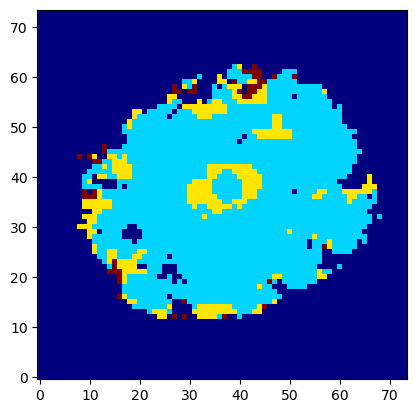

In [2]:
import numpy as np
import matplotlib.pyplot as plt
label_map = np.load('/gscratch/scrubbed/mmckay18/DATA/processed/labels/BPT/12624-12703.npy', allow_pickle=True)
np.unique(label_map)
plt.imshow(label_map, cmap='jet', origin='lower')

In [5]:
np.unique(label_map, return_counts=True)


(array([0., 1., 2., 3.], dtype=float32), array([3390, 1742,  292,   52]))

In [4]:
np.unique?

In [17]:
import pandas as pd
val_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/val_fits.csv')
val_df.head

<bound method NDFrame.head of   /gscratch/scrubbed/mmckay18/DATA/raw/11872/12704/manga-11872-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
0  /gscratch/scrubbed/mmckay18/DATA/raw/9868/3703...                                                      
1  /gscratch/scrubbed/mmckay18/DATA/raw/8714/6101...                                                      
2  /gscratch/scrubbed/mmckay18/DATA/raw/8940/1270...                                                      
3  /gscratch/scrubbed/mmckay18/DATA/raw/7992/3702...                                                      
4  /gscratch/scrubbed/mmckay18/DATA/raw/8252/6102...                                                      
5  /gscratch/scrubbed/mmckay18/DATA/raw/9486/1270...                                                      
6  /gscratch/scrubbed/mmckay18/DATA/raw/9090/3704...                                                      
7  /gscratch/scrubbed/mmckay18/DATA/raw/10501/610...                                                      >

In [21]:
val_df.iloc[4][0]

'/gscratch/scrubbed/mmckay18/DATA/raw/8252/6102/manga-8252-6102-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz'

### Download a single file from SDSS server where MsNGA data is stored

In [25]:
new_df['PLATEIFU'][0]

'8442-12704'

In [35]:
# url_str, save_path = get_url(PLATEIFU=new_df['PLATEIFU'][0], key='LOGCUBE')
# print(f'URL : {url_str}')
# print(f'save : {save_path}, {type(str(save_path))}')

URL : https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/SPX-MILESHC-MASTARSSP/8442/12704/manga-8442-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
save : /gscratch/astro/mmckay18/DATA/raw/8442/12704/manga-8442-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz, <class 'str'>


In [29]:
# fetch_and_save(url_str, save_path)

('https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/SPX-MILESHC-MASTARSSP/8442/12704/manga-8442-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz',
 b'',
 None)

In [30]:
# download_file(url_str, save_path)

File downloaded successfully and saved as /gscratch/astro/mmckay18/DATA/raw/8442/12704/manga-8442-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz


In [36]:
# download_single_cube(str(save_path), key='LOGCUBE')

('https://data.sdss.org/sas/dr17/manga/spectro/analysis/v3_1_1/3.1.0/SPX-MILESHC-MASTARSSP/8442/12704/manga-8442-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz',
 b'',
 None)

In [51]:
!python process_single_cube.py --patch_size=9 --patch_norm=global --label_task=BPT --plateid=10215-12702

	Cube already exists!
	/gscratch/scrubbed/mmckay18/DATA/processed/cubes/10215/12702.h5
	Generating patches:
	/gscratch/scrubbed/mmckay18/DATA/processed/patches/BPT/global/10215-12702
Start patchify
(74, 74, 2040)
	Label Path: /gscratch/scrubbed/mmckay18/DATA/processed/labels/BPT/10215-12702.npy
(74, 74)


## Make BPT labels

In [5]:
pwd

'/mmfs1/gscratch/astro/mmckay18/gumby-spectral-imaging_fork/HSI'

In [14]:
fits_file = '/gscratch/astro/mmckay18/DATA/raw/10215/12702/manga-10215-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz'
plateifu = '-'.join(fits_file.split('/')[-3:-1])
plateifu

'10215-12702'

In [41]:
process_cube

<function fits_utils.process_cube(fits_file, cube_file, new_wave_range=[5000.0, 8000.0], new_num_wave=2040, verbose=False)>

In [8]:
process_cube(
    fits_file = '/gscratch/astro/mmckay18/DATA/raw/10215/12702/manga-10215-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz',
    cube_file = '/gscratch/astro/mmckay18/DATA/processed/cubes/10215/12702.h5'
)


gfdsauikgferuie /gscratch/astro/mmckay18/DATA/raw/10215/12702/manga-10215-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz, <class 'str'>
/gscratch/astro/mmckay18/DATA/raw/10215/12702/manga-10215-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
48
	PlateIFU: 10215-12702, z: 0.04404370114207268 
	 Path: /gscratch/astro/mmckay18/DATA/raw/10215/12702/manga-10215-12702-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
Saved to:
	/gscratch/astro/mmckay18/DATA/processed/cubes/10215/12702.h5


In [13]:
label_map = np.load('/gscratch/astro/mmckay18/DATA/processed/labels/BPT/8442-12702.npy', allow_pickle=True)
label_map

ValueError: cannot reshape array of size 0 into shape (74,74)

In [10]:
pwd

'/mmfs1/gscratch/astro/mmckay18/gumby-spectral-imaging_fork/HSI'

In [26]:
split_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train-global.csv')
print(len(split_df))
split_df.head()

154687


,data,label
0,/gscratch/scrubbed/mmckay18/DATA/processed/pat...,1.0
1,/gscratch/scrubbed/mmckay18/DATA/processed/pat...,2.0
2,/gscratch/scrubbed/mmckay18/DATA/processed/pat...,1.0
3,/gscratch/scrubbed/mmckay18/DATA/processed/pat...,1.0
4,/gscratch/scrubbed/mmckay18/DATA/processed/pat...,1.0


In [64]:
import glob

fits_splits_df = pd.read_csv('/gscratch/scrubbed/mmckay18/DATA/splits/BPT/val_fits.csv')
fits_splits_df.columns
data_list = []
label_list = []


for path_split_df in fits_splits_df[fits_splits_df.columns[0]]:
    
    plate, ifu = path_split_df.split('/')[-3], path_split_df.split('/')[-2]
   

    list_of_patch_filepath = glob.glob(f'/gscratch/scrubbed/mmckay18/DATA/processed/patches/BPT/global/{plate}-{ifu}/*npy')
    list_of_patch_filepath
    
    for patch_filepath in list_of_patch_filepath[:10]:
        data = patch_filepath
        label = float(patch_filepath.split('/')[-1].split('_')[-1].split('.npy')[0])
        data_list.append(data)
        label_list.append(label)
#         print(label)
        
# Create a new DataFrame from the data and label lists
new_df = pd.DataFrame()
new_df['data'] = data_list
new_df['label'] = label_list

# Save the DataFrame to a CSV file
csv_path = '/gscratch/scrubbed/mmckay18/DATA/splits/BPT/train_global_test.csv'
new_df.to_csv(csv_path, index=True)

print(f"Data and labels saved to {csv_path}")

len(new_df)

Data and labels saved to /gscratch/scrubbed/mmckay18/DATA/splits/BPT/train_global_test.csv


1070

In [ ]:
11744-6103

In [22]:
import os
import pandas as pd

# Function to list all directories in the specified path
def list_directories(base_path):
    directories = []
    for root, dirs, files in os.walk(base_path):
        for dir_name in dirs:
            directories.append(os.path.join(root, dir_name))
    return directories

# Specify the path you want to list directories from
base_path = '/gscratch/scrubbed/mmckay18/DATA/processed/patches/BPT/global/10215-12702/'

# Get the list of directories
directory_list = list_directories(base_path)
print(directory_list)

# # Create a DataFrame from the list of directories
# df = pd.DataFrame(directory_list, columns=['Directory'])

# # Save the DataFrame to a CSV file
# csv_path = 'directories_list.csv'
# df.to_csv(csv_path, index=False)

# print(f"List of directories saved to {csv_path}")

[]


In [42]:
# Make patch fits files using stiched code from gumby code
input_fits_csv = '/gscratch/scrubbed/mmckay18/DATA/processed/patches/BPT/global/10215-12702/'
data_dir = '/gscratch/scrubbed/mmckay18/DATA/'
split_dir = 'BPT'
patch_norm = 'global'

csv_dir = data_dir / 'splits' / args.split_dir
if args.splits=='all':
    file_list_dict = {
        'train': csv_dir / f'train_fits.csv',
        'val': csv_dir / f'val_fits.csv',
        'test': csv_dir / f'test_fits.csv',
    }
elif args.splits == 'test':
    file_list_dict = {
        'val': csv_dir / f'val_fits.csv',
        'test': csv_dir / f'test_fits.csv',
    }
elif args.splits == 'train':
    file_list_dict = {
        'train': csv_dir / f'train_fits.csv',
    }
for split_key, input_fits_csv in file_list_dict.items():
    print(f'{split_key}...')
    list_of_fits_files = pd.read_csv(
        input_fits_csv, 
        header=None, 
        names=['fits_file']
    )['fits_file'].to_list()
    # CSV file containing list of all patches
    output_patch_csv = csv_dir / f'{split_key}-{patch_norm}.csv'
    print(f'patch_norm is {patch_norm} \n {output_patch_csv}')

    n_fits = len(list_of_fits_files)
    if args.reverse:
        list_of_fits_files = list_of_fits_files[::-1]
    for i, fits_file in enumerate(list_of_fits_files):
        print(f"{i+1}/{n_fits}...")
        print(f"\t{fits_file}")

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [2]:
pwd

'/mmfs1/gscratch/astro/mmckay18/gumby-spectral-imaging_fork/HSI'